In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

/kaggle/input/us-accidents/US_Accidents_Dec19.csv


In [84]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec19.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [85]:
df1=df[['State','Start_Time', 'End_Time','Number']]
df1

,State,Start_Time,End_Time,Number
0,OH,2016-02-08 05:46:00,2016-02-08 11:00:00,NaN
1,OH,2016-02-08 06:07:59,2016-02-08 06:37:59,2584.0
2,OH,2016-02-08 06:49:27,2016-02-08 07:19:27,NaN
3,OH,2016-02-08 07:23:34,2016-02-08 07:53:34,NaN
4,OH,2016-02-08 07:39:07,2016-02-08 08:09:07,NaN
...,...,...,...,...
2974330,CA,2019-08-23 18:03:25,2019-08-23 18:32:01,NaN
2974331,CA,2019-08-23 19:11:30,2019-08-23 19:38:23,NaN
2974332,CA,2019-08-23 19:00:21,2019-08-23 19:28:49,NaN
2974333,CA,2019-08-23 19:00:21,2019-08-23 19:29:42,NaN


In [86]:
df1.dtypes

State          object
Start_Time     object
End_Time       object
Number        float64
dtype: object

In [87]:
# Obtaining all the possible numeric columns
df1.describe()

,Number
count,1.056730e+06
mean,5.837004e+03
std,1.515928e+04
min,0.000000e+00
25%,8.370000e+02
50%,2.717000e+03
75%,7.000000e+03
max,9.999997e+06


In [88]:
#We can make the start and End Times real datetime columns
df1['Start_Time'] = pd.to_datetime(df1['Start_Time'])
df1['End_Time'] = pd.to_datetime(df1['End_Time'])
df1.dtypes

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


State                 object
Start_Time    datetime64[ns]
End_Time      datetime64[ns]
Number               float64
dtype: object

In [89]:
#Lets identify columns with Nulls and NaNs.

df1.isnull().sum()

State               0
Start_Time          0
End_Time            0
Number        1917605
dtype: int64

In [90]:
df1.isna().sum()

State               0
Start_Time          0
End_Time            0
Number        1917605
dtype: int64

In [91]:
#Cleanup some columns by removing Nulls or Filling NaNs
#Define a funcation impute median
def impute_median(series):
    return series.fillna(series.median())

def impute_mean(series):
    return series.fillna(series.mean())

In [92]:
df1.Number = df['Number'].transform(impute_mean)
df1.isnull().sum()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


State         0
Start_Time    0
End_Time      0
Number        0
dtype: int64

In [93]:
#Add day's column in our data.
df1['day'] = df1['Start_Time'].dt.day
#Add Week_day column in the data.
df1['weekday'] = df1['Start_Time'].dt.weekday
#Add Month column in the data.
df1['month'] = df1['Start_Time'].dt.month
#Add Hour column in the data.
df1['hour'] = df1['Start_Time'].dt.hour

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [94]:
df1=df1.drop(['Start_Time'],axis='columns')
df1=df1.drop(['End_Time'],axis='columns')

In [95]:
df1.head()


,State,Number,day,weekday,month,hour
0,OH,5837.003544,8,0,2,5
1,OH,2584.000000,8,0,2,6
2,OH,5837.003544,8,0,2,6
3,OH,5837.003544,8,0,2,7
4,OH,5837.003544,8,0,2,7


In [96]:
gp=df1.groupby(['State'])
df3=gp.apply(lambda x: x.name)
df3.reset_index(drop=True, inplace=True)
Data = {'x':df1.groupby(['State'], as_index=False).mean().Number,
        'y':df3
       }
Data

{'x': 0      5891.908963
 1      5706.948082
 2      5984.553558
 3      6477.885656
 4      6323.938958
 5      4727.839542
 6      4338.704767
 7      3602.024717
 8      6364.714242
 9      5003.335803
 10     5695.205846
 11    13232.628964
 12     5700.133389
 13     5122.038794
 14     5913.368918
 15     4976.709116
 16     5030.365697
 17     3994.870560
 18     5936.955626
 19     4683.076361
 20     5643.469913
 21     7086.749417
 22     5662.489274
 23     5643.875486
 24     7533.895283
 25     4949.384292
 26     6242.305045
 27     5994.927692
 28     4125.630695
 29     4466.456127
 30     5331.684922
 31     5138.015175
 32     4702.096313
 33     5278.352478
 34     5313.724775
 35    14939.049961
 36     3360.525963
 37     5211.900384
 38     3793.028115
 39     9391.252067
 40     4486.597141
 41     5614.207244
 42     5245.570876
 43     6557.461767
 44     3500.428901
 45     6682.830999
 46     5490.244523
 47     5651.936621
 48     5970.624919
 Name: Number, 

In [97]:
from pandas import DataFrame
df5= DataFrame(Data,columns=['x','y'])

In [98]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df5['y']=label_encoder.fit_transform(df5['y'])

[[ 4625.32006582    25.47826087]
 [14085.83946238    23.        ]
 [ 6215.07847864    22.66666667]]


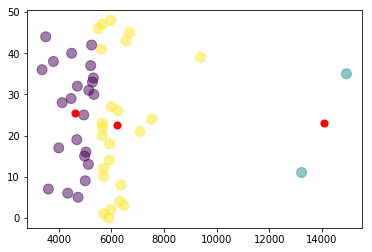

In [133]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df5)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df5['x'], df5['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [134]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [135]:
df2=ClusterIndicesNumpy(0, kmeans.labels_)
df3=ClusterIndicesNumpy(1, kmeans.labels_)
df4=ClusterIndicesNumpy(2, kmeans.labels_)

In [136]:
L1 = list(label_encoder.inverse_transform(df2))
print(L1)

['CT', 'DC', 'DE', 'GA', 'IN', 'KY', 'LA', 'MA', 'ME', 'NC', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'PA', 'RI', 'SC', 'TN', 'UT', 'VT']


In [137]:
L2 = list(label_encoder.inverse_transform(df3))
print(L2)

['ID', 'OR']


In [138]:
L3 = list(label_encoder.inverse_transform(df4))
print(L3)

['AL', 'AR', 'AZ', 'CA', 'CO', 'FL', 'IA', 'IL', 'KS', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'ND', 'NE', 'SD', 'TX', 'VA', 'WA', 'WI', 'WV', 'WY']
